## Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

## Data import and structure investigation

In [3]:
#Loading dataset
df=pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Check number of data rows
df.shape

(1460, 81)

In [5]:
#check column types
pd.value_counts(df.dtypes)

object     43
int64      35
float64     3
dtype: int64

We have numerical and non numerical features in the data. Let's start with inspection of the non-numerical ones. They are listed as object type, so let's look what kind of the data do they really represent?

#### Inspecting non-numerical data

In [6]:
#Inspect which columns are of object type
pd.set_option('display.max_columns', 90)
print(df.select_dtypes(exclude="number"))

     MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition

It seems that all the data categorized as object are in fact string, so let's switch them to string (as should be)

In [7]:
#Switching data types
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = pd.Series(df[col], dtype="string")
        
pd.value_counts(df.dtypes)

string     43
int64      35
float64     3
dtype: int64

In [8]:
#investigate uniqe values for each non-numerical data
df.describe(exclude="number")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


Some of the features are apparently missing data (like Alley - only 91 entries out of 1460, PoolQc - only 7 out of 1460) and are first in line for dropping out. For others we have a dominant that covers almost all of the cases (like street: 1454 out of 1460 or utilities: 1459 out of 1460) - they are also candidates for dropping as they won't explain much in data.

#### Inspecting numerical data

<AxesSubplot:title={'center':'Unique values per feature'}>

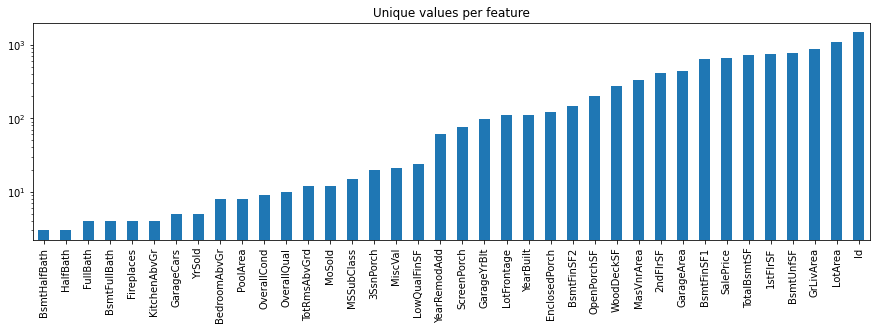

In [9]:
# For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")

There is a number of features that don't have many unique values (below 10 categories, ex. HalfBath) and maybe should be considered as nominal rather than numeric. 

### Quality investigation

#### Duplicates investigation

In [10]:
n_duplicates = df.drop(labels=["Id"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 0 duplicates in your database.


We don't have duplicates (based on ID, we assume that two different hauses wouldn't be given the same ID)

#### Missing values - per sample and per feature

##### Identify the cases

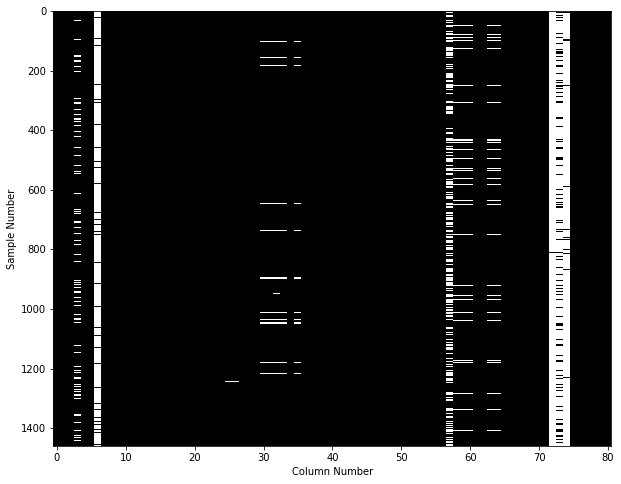

In [11]:
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

Y-axis shows individual samples, x-axis consequitive features. Apparently there are some features with a lot of missing values, and some of the records with a higher number of missing values. Let's see it more precisely:

<AxesSubplot:>

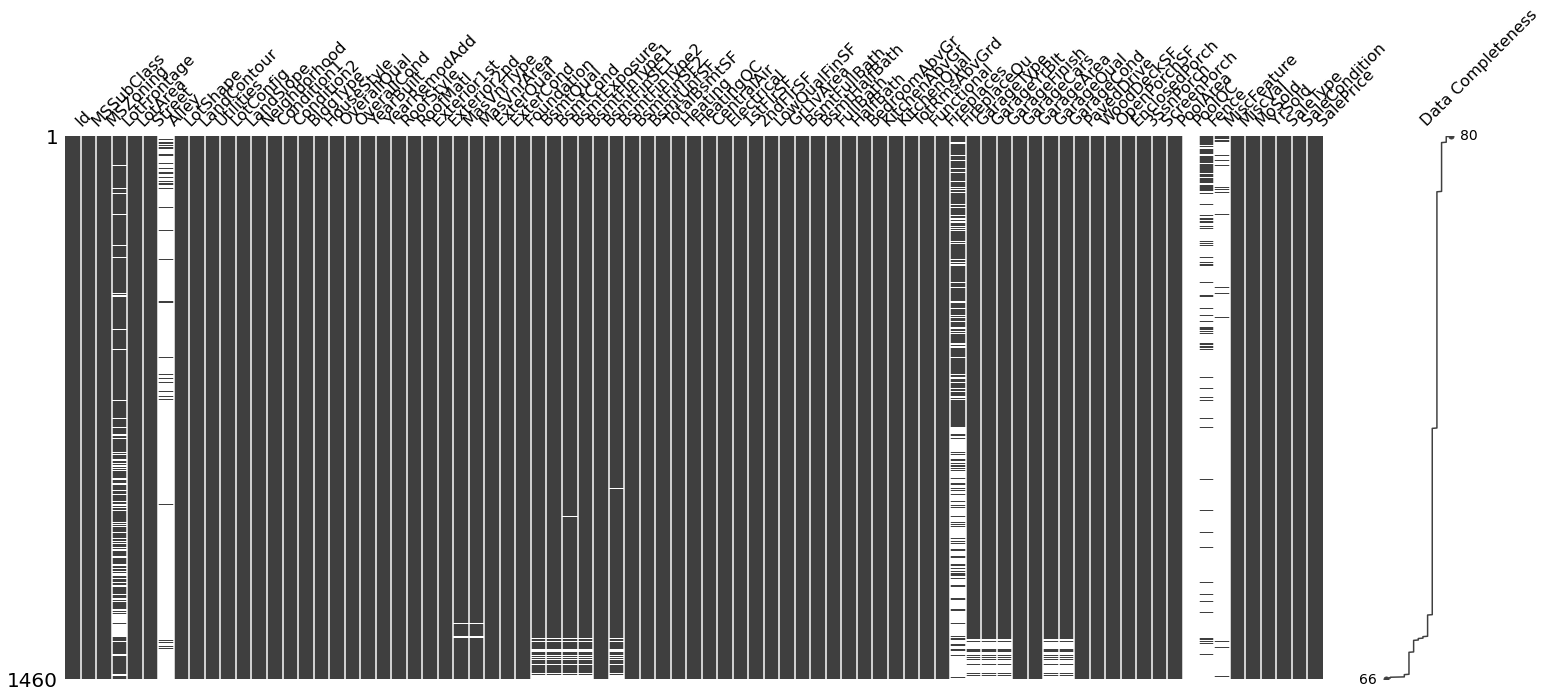

In [13]:
msno.matrix(df, labels=True, sort="descending")

The plot shows that all the cases have at least 66% (and up to 80%) of all the features. That is a good percentage and suggests rather inserting missing values, than dropping cases.

When inspectiong the features we see that the missing values correspond mostly to columns:
- Alley
- FireplaceQu
- PoolQC
- Fence
- MiscFeature

These columns are first to be dropped. Let's confirm it with another plot:

<AxesSubplot:title={'center':'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

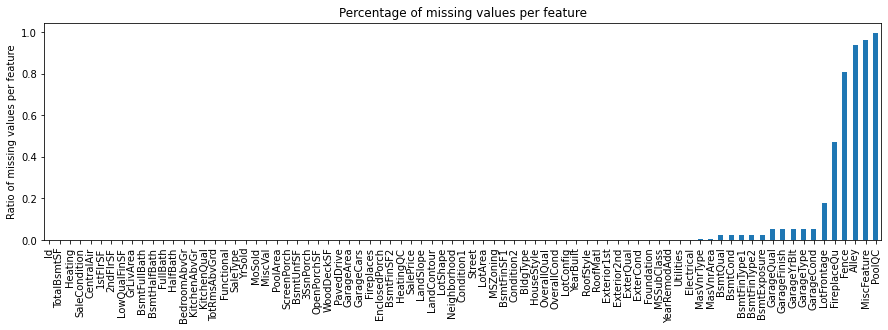

In [14]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")

Indeed we indentified the features with the highest percentage of missing values. Additionally LotFrontage seems to have a lot of missing ones as well. Let's drop them all (all that have above 15% of missing values) and see the visualizations again.

##### Drop missing columns

In [18]:
df = df.dropna(thresh=df.shape[0] * 0.85, axis=1)

<AxesSubplot:>

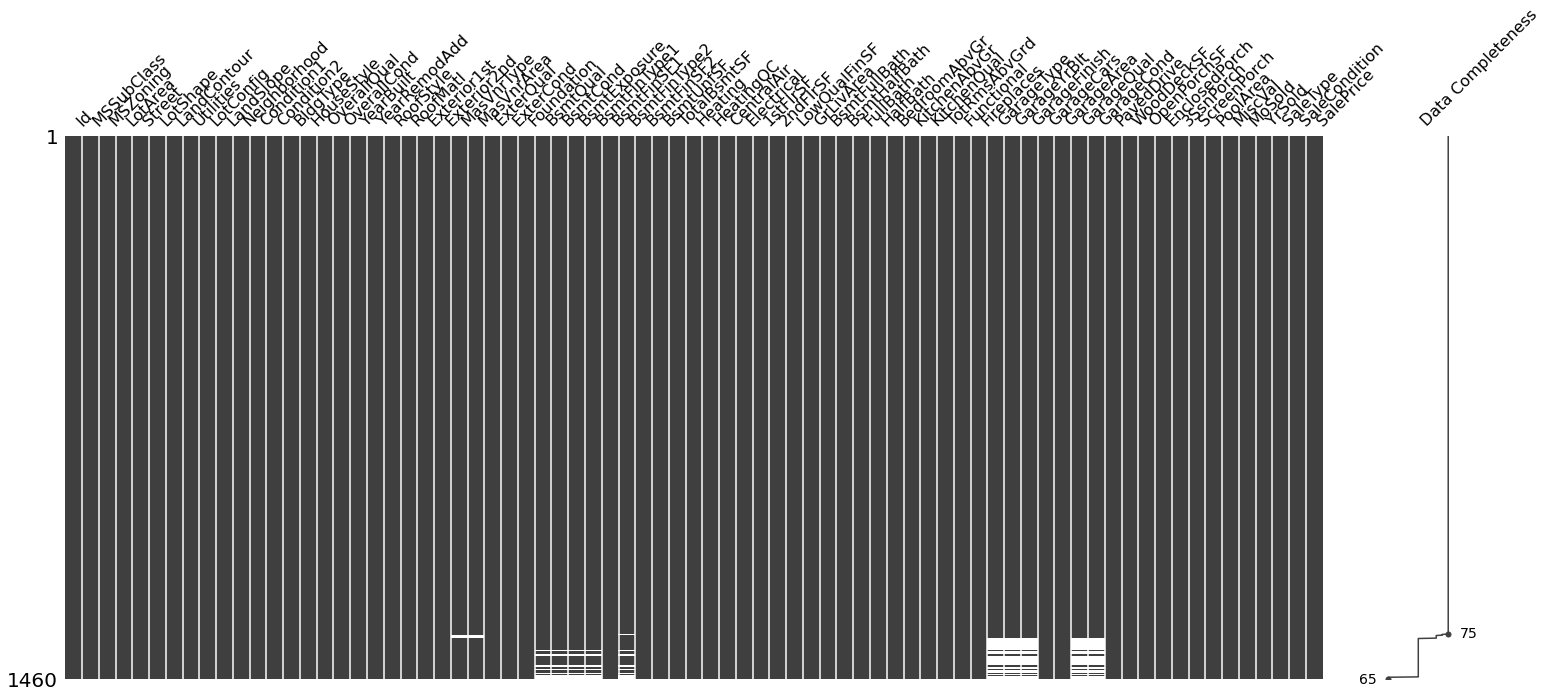

In [19]:
msno.matrix(df, labels=True, sort="descending")

<AxesSubplot:title={'center':'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

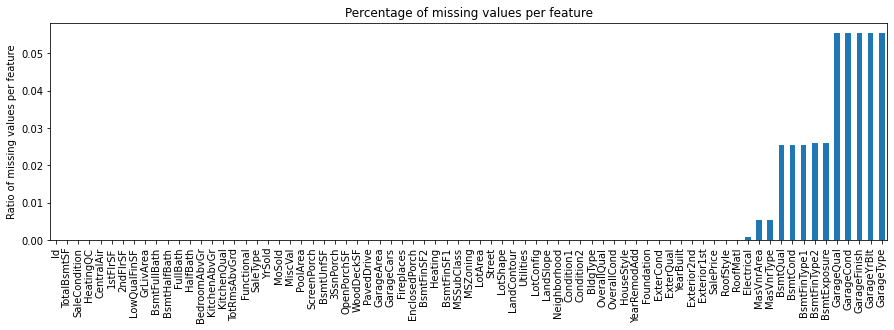

In [20]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")

So now most of the data is complete. But some of the cases are still missing values. We can try imputing them.

##### Replace missing values

Let's start with checking the names and the types of the data that is missing.

In [37]:
df.columns[df.isnull().any()]

Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [39]:
[type(col) for col in df.columns if df[col].isnull().any()]

[str, str, str, str, str, str, str, str, str, str, str, str, str]

We are only missing categorical data. Hence the best way would be to replace the missing values with dominant for each of the categories.

In [41]:
for column in df.columns[df.isnull().any()]:
    #print(column)
    df[column].fillna(df[column].mode()[0], inplace=True)

Let's inspect if it worked

<AxesSubplot:>

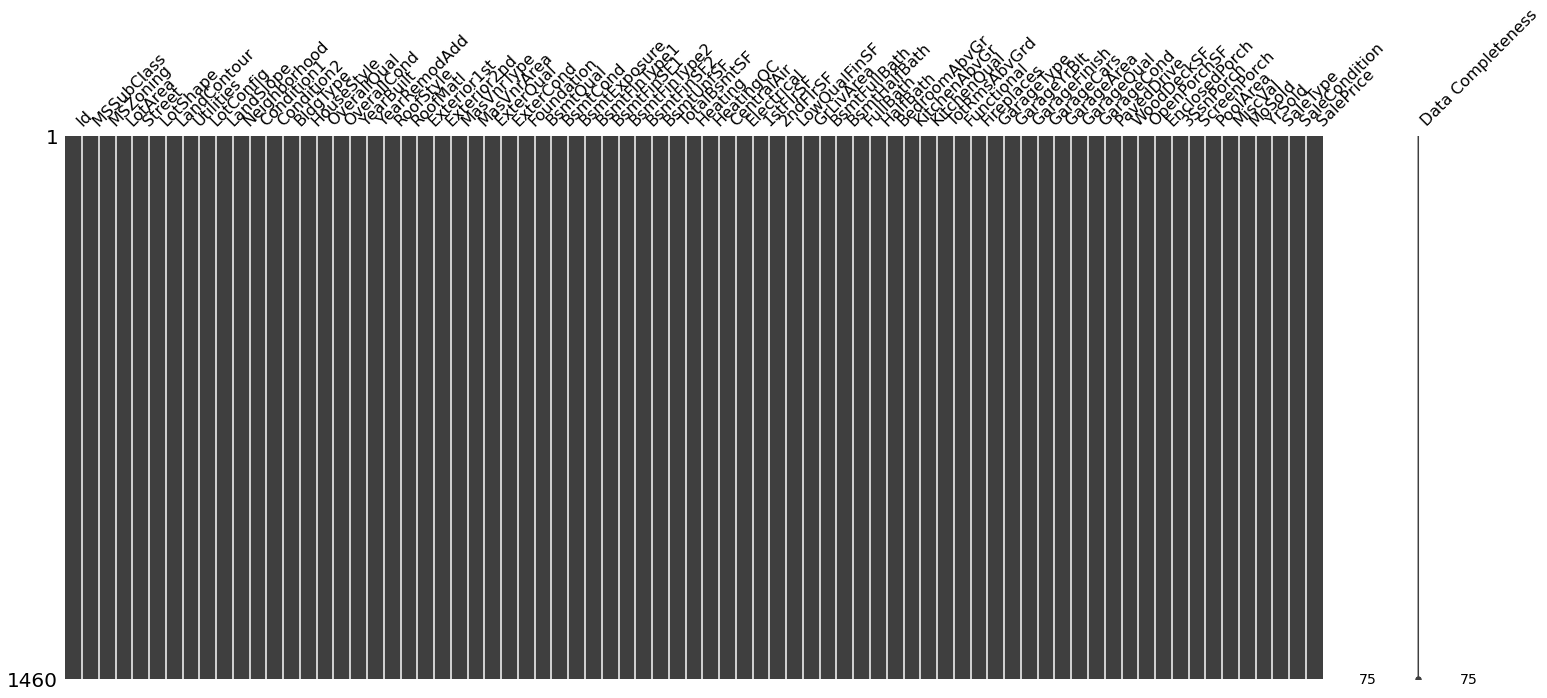

In [42]:
msno.matrix(df, labels=True, sort="descending")

Yay! Now all data is complete! We can inspect further!